# Cuantificación del color usando K-Means

Realiza una cuantificación vectorial por píxeles (VQ) de una imagen del palacio de verano (China), reduciendo el número de colores necesarios para mostrar la imagen de 96.615 colores únicos a 64, preservando al mismo tiempo la calidad de apariencia general.

En este ejemplo, los píxeles se representan en un espacio 3D y K-means se utiliza para encontrar 64 grupos de colores. En la literatura de procesamiento de imágenes, el libro de códigos obtenido de K-means (los centros de grupo) se llama paleta de colores. Usando un solo byte, se pueden abordar hasta 256 colores, mientras que una codificación RGB requiere 3 bytes por píxel. El formato de archivo GIF, por ejemplo, utiliza dicha paleta.

Para la comparación, también se muestra una imagen cuantificada utilizando un libro de códigos aleatorio (colores recogidos al azar).

In [16]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from PIL import Image


In [26]:
n_colors = 64

image_path = 'images/new.jpg'
china = Image.open(image_path)

## Convierte a flotantes en lugar de la codificación predeterminada de 8 bits enteros. Dividiendo por

255 es importante para que plt.imshow funcione bien con datos de punto flotante (debe estar en el rango [0-1]).

In [18]:
china = np.array(china, dtype=np.float64) / 255

## Cargar la imagen y transformarla en un arreglo 2D de numpy.

In [19]:
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [20]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.046s.


## Obtener etiquetas para todos los puntos


In [21]:
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.026s.


In [22]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 0.035s.


In [23]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

## Mostrar todos los resultados, junto con la imagen original

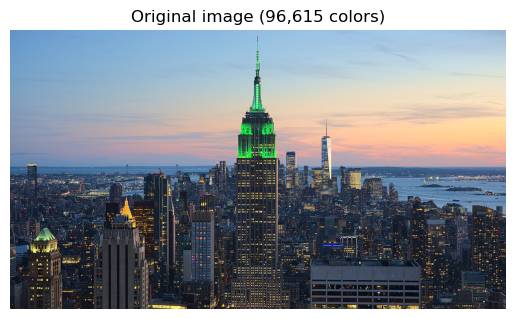

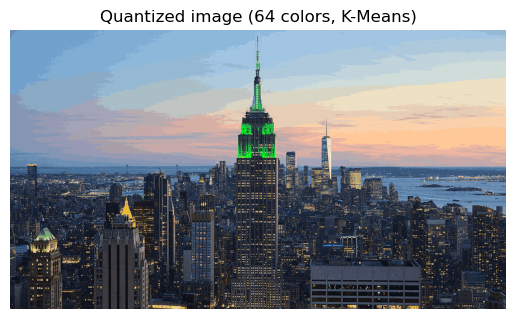

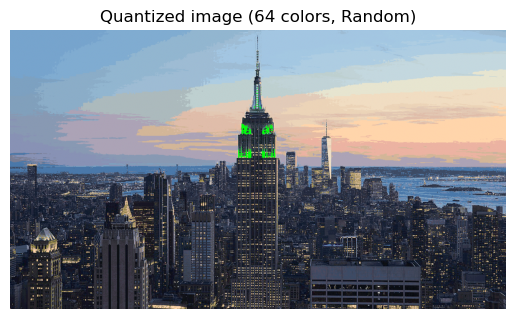

In [24]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))